In [1]:
# Make sure we can import EMQST_lib from parent directory
import sys
from pathlib import Path

# Go two levels up from current working directory
PROJECT_ROOT = Path.cwd().resolve().parents[1]   # <- one up (your earlier case)


if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

print("Using project root:", PROJECT_ROOT)

# Notebook is in project-root/Multiplexed_qubit_readout_results/
# -> project root is the parent of the current working dir
PROJECT_ROOT = Path.cwd().resolve().parent


if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))


import numpy as np 
from datetime import datetime
import os
import uuid
from EMQST_lib import adaptive_functions as ad
from EMQST_lib.qst import QST  
from EMQST_lib import measurement_functions as mf
from EMQST_lib import visualization as vis
from EMQST_lib import support_functions as sf
from EMQST_lib.povm import POVM
%load_ext autoreload
%autoreload 2

Using project root: /workspaces/REMQST


In [2]:
n_shots_total = 3000
n_qubits = 2
n_shots = n_shots_total//3**n_qubits
n_averages = 20
adaptive_burnin = 500

true_states = np.array([sf.generate_random_pure_state(n_qubits) for _ in range(n_averages)])
#true_states = [np.kron(sf.generate_random_pure_state(1),sf.generate_random_pure_state(1)) for _ in range(n_averages) ]
povm = POVM.generate_Pauli_POVM(n_qubits)
qst = QST(povm, true_states, n_shots, n_qubits, False,{})
print(f'Total shots: {n_shots_total * n_averages}')
infidelity_container = []
#d_st = 0.000
qst_array = []
noise_strengths = []

qst.perform_adaptive_BME(adaptive_burnin_steps = adaptive_burnin)

#n_steps = 1

# for i in range(n_steps):

#     qst.perform_adaptive_BME(depolarizing_strength = 0,#i*d_st,
#                              adaptive_burnin_steps = adaptive_burnin)
#     infidelity_container.append(qst.get_infidelity())
#     noise_strengths.append(i * d_st)
#     qst_array.append(qst)
    
settings = {
    'n_shots': n_shots,
    'n_qubits': n_qubits,
    'n_averages': n_averages,
    'adaptive_burnin': adaptive_burnin,
    'noise_strengths': noise_strengths,
    'true_states': true_states
}

path = "adaptive_results/test"
now=datetime.now()
now_string = now.strftime("%Y-%m-%d_%H-%M-%S_")
dir_name= now_string+str(uuid.uuid4())
data_path=f'{path}/{dir_name}'
os.mkdir(data_path)

with open(f'{data_path}/infidelity_container.npy', 'wb') as f:
    np.save(f, infidelity_container)
with open(f'{data_path}/settings.npy', 'wb') as f:    
    np.save(f, settings)


Total shots: 60000
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Completed run 1/20. Final infidelity: 0.019015414422098087.
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Completed run 2/20. Final infidelity: 0.020058724711128906.
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Completed run 3/20. Final infidelity: 0.02117325616141741.
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Completed run 4/20. Final infidelity: 0.018645576950405363.
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Completed run 5/20. Final infidelity: 0.016787463002902347.
Resampling
Resampling
Resampling
Resampling


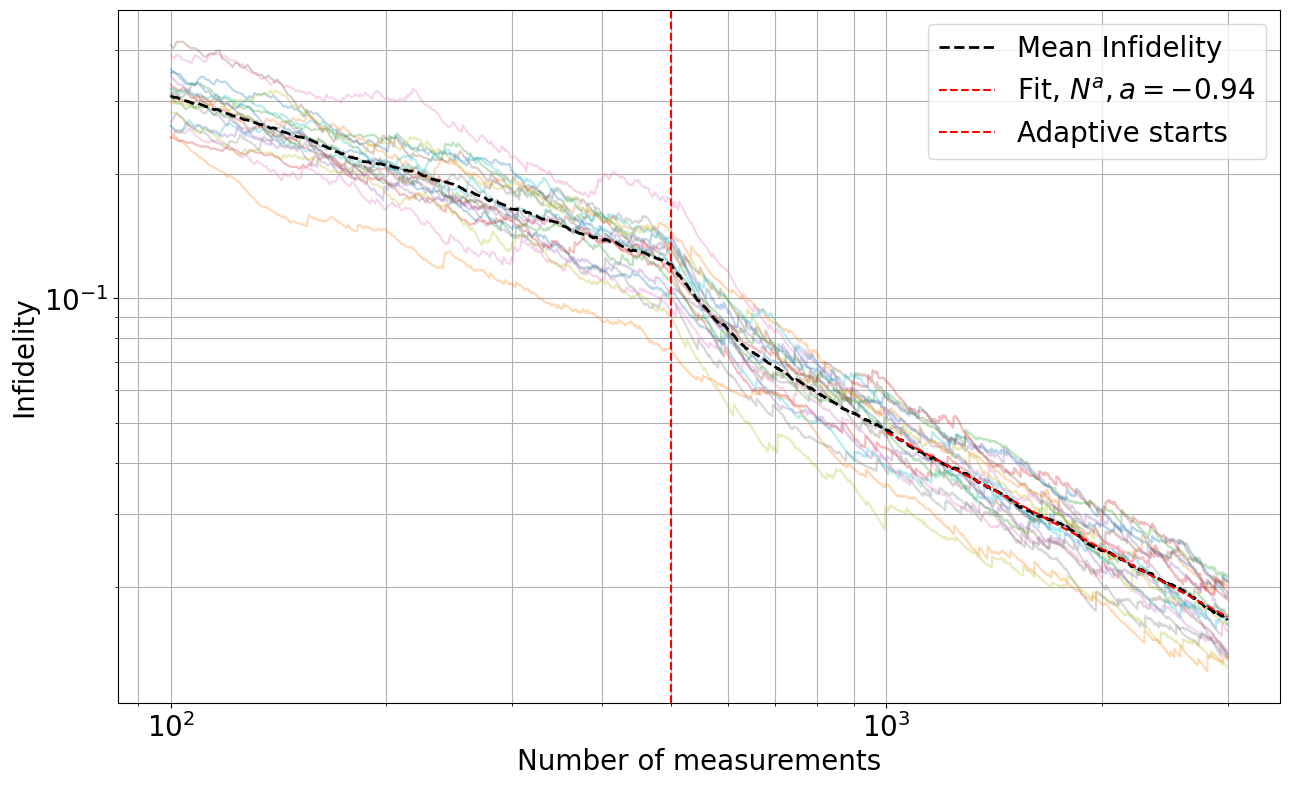

Mean final infidelity 0.01663507559645198


1

In [3]:
vis.plot_infidelity_curves(qst, adaptive_burnin = settings['adaptive_burnin'])